In [223]:
# Libraries to be imported for EDA 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


## Models for the splitting the samples into train_test
from sklearn.model_selection import train_test_split
from sklearn import model_selection


## Models for Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import linear_model, datasets
from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score


## Lifeline Models
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines import NelsonAalenFitter


# Model Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

# Model Optimization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

## Standard Scaler
from sklearn.preprocessing import StandardScaler

## Score
from sklearn.metrics import accuracy_score



In [224]:
# Importing ignoring system warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [225]:
## Loading the data files for Model Devopment
data_r = pd.read_csv('C:/Users/jlpar/Documents/Springboard Curriculum/Data/petadoption/petfinder-adoption-prediction/train.csv')
data_r.head(3)




,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3


In [226]:
## Quick check on the dataframe
data_r.describe(include='all')

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
count,14993.000000,13736,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993,14993.000000,14981,14993,14993.000000,14993.000000
unique,NaN,9060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5595,NaN,14032,14993,NaN,NaN
top,NaN,Baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,fa90fa5b1ee11c86938398b60abc32cb,NaN,For Adoption,6a07fdc22,NaN,NaN
freq,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,459,NaN,164,1,NaN,NaN
mean,1.457614,NaN,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,1.036617,1.576069,21.259988,41346.028347,NaN,0.056760,NaN,NaN,3.889215,2.516441
std,0.498217,NaN,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,0.199535,1.472477,78.414548,32.444153,NaN,0.346185,NaN,NaN,3.487810,1.177265
min,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,41324.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
25%,1.000000,NaN,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,41326.000000,NaN,0.000000,NaN,NaN,2.000000,2.000000
50%,1.000000,NaN,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,41326.000000,NaN,0.000000,NaN,NaN,3.000000,2.000000
75%,2.000000,NaN,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,1.000000,1.000000,0.000000,41401.000000,NaN,0.000000,NaN,NaN,5.000000,4.000000


In [227]:
## Dropping Non Numerical Attributes
data_r2 = data_r.drop(['Description','PhotoAmt','VideoAmt','RescuerID'],  axis=1)
data_r2.columns


Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'PetID',
       'AdoptionSpeed'],
      dtype='object')

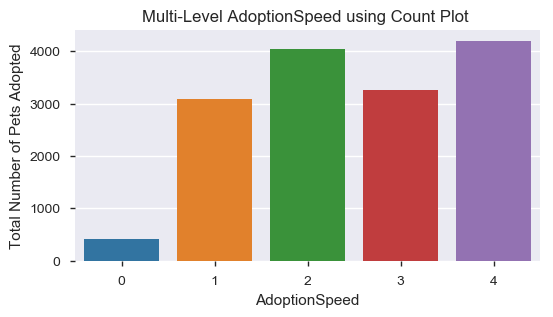

In [228]:
# Printing the Bar and Count Plot for AdoptionSpeed variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('AdoptionSpeed', data=data_r2)
ax.set_title('Multi-Level AdoptionSpeed using Count Plot ')
ax.set_xlabel('AdoptionSpeed')
ax.set_ylabel('Total Number of Pets Adopted')

plt.show()

In [229]:
# Creating another column for the new binned AdoptionSeed variable
data_r2["AdoptionSpeed_t"]=data_r2["AdoptionSpeed"]
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PetID,AdoptionSpeed,AdoptionSpeed_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,2,2,1,1,100,41326,86e1089a3,2,2


In [230]:
## Binnng the AdoptionSpeed Category into a binary data set
data_r2.AdoptionSpeed_t[data_r2.AdoptionSpeed == 0] = 0
data_r2.AdoptionSpeed_t[data_r2.AdoptionSpeed == 1] = 0
data_r2.AdoptionSpeed_t[data_r2.AdoptionSpeed == 2] = 0
data_r2.AdoptionSpeed_t[data_r2.AdoptionSpeed == 3] = 0
data_r2.AdoptionSpeed_t[data_r2.AdoptionSpeed == 4] = 1

data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PetID,AdoptionSpeed,AdoptionSpeed_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,2,2,1,1,100,41326,86e1089a3,2,0


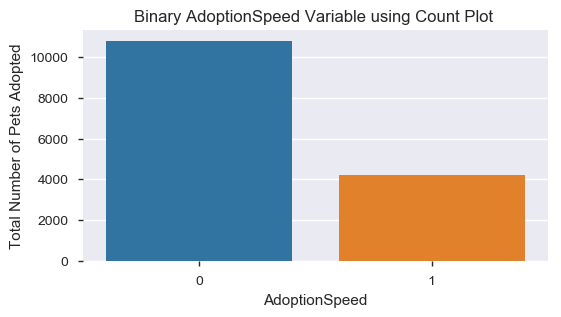

In [231]:
 # Printing the Bar and Count Plot for the new Binned AdoptionSPeed_t variable. 
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('AdoptionSpeed_t', data=data_r2)
ax.set_title('Binary AdoptionSpeed Variable using Count Plot ')
ax.set_xlabel('AdoptionSpeed')
ax.set_ylabel('Total Number of Pets Adopted')

plt.show()

In [232]:
# Creating a new column for the log10 tranformed Age Variable
data_r2["Age_t"]=data_r2["Age"]
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,2,1,1,100,41326,86e1089a3,2,0,3


In [233]:
## Log10 Transformation for the Age 
data_r2.Age_t= np.log10(data_r2.Age_t)
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,2,1,1,100,41326,86e1089a3,2,0,0.477121


In [234]:
## Replacing all "inf" Values for the Age Transformed variable
data_r2['Age_t']= data_r2['Age_t'].replace(-np.inf, 0)

In [235]:
## Checking the Age Transformed variable
data_r2.Age_t.unique()

array([0.47712125, 0.        , 0.60205999, 1.07918125, 0.30103   ,
       1.8920946 , 0.77815125, 0.90308999, 1.        , 1.5563025 ,
       1.14612804, 1.38021124, 0.69897   , 1.8573325 , 1.77815125,
       0.95424251, 1.68124124, 1.79239169, 1.67209786, 1.2787536 ,
       2.07918125, 1.50514998, 0.84509804, 1.23044892, 1.34242268,
       1.20411998, 1.11394335, 1.04139269, 1.56820172, 1.25527251,
       1.74036269, 1.30103   , 1.44715803, 1.86923172, 1.72427587,
       1.39794001, 1.92427929, 1.88081359, 1.47712125, 2.12057393,
       1.98227123, 1.66275783, 1.17609126, 1.69897   , 1.74818803,
       1.73239376, 1.36172784, 1.96378783, 1.462398  , 1.43136376,
       1.69019608, 1.64345268, 2.15836249, 1.32221929, 1.49136169,
       1.61278386, 1.70757018, 1.81291336, 1.53147892, 2.13033377,
       1.59106461, 1.71600334, 1.62324929, 2.03342376, 1.90848502,
       1.41497335, 1.5797836 , 1.83884909, 2.32633586, 1.51851394,
       1.87506126, 1.97772361, 1.90308999, 1.79934055, 1.78532

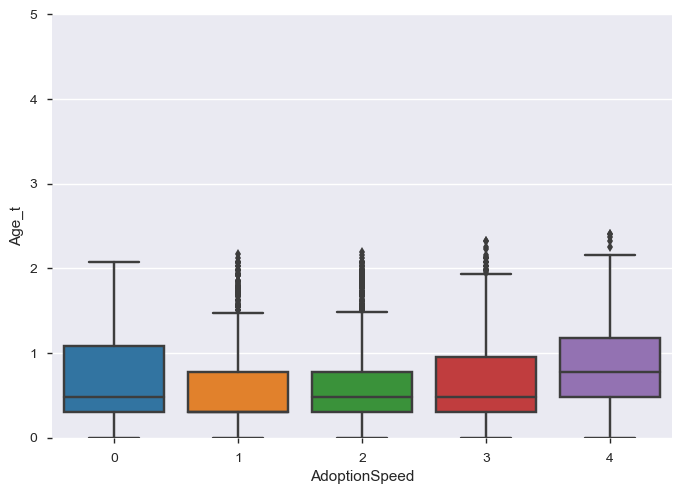

<Figure size 300x300 with 0 Axes>

In [236]:
# Box and Whisker plot for the Age transformed variable
fig = sns.boxplot(x='AdoptionSpeed', y="Age_t", data=data_r2)
fig.axis(ymin=0, ymax=5);
plt.figure(figsize=(3,3))
plt.show()

In [237]:
#set up bins for the Age Bin Variable
bin = [0, 1, 2, 3, 5, 10, 25, 255]

#use pd.cut function can attribute the values into its specific bins
category = pd.cut(data_r2.Age, bin)
category = category.to_frame()
category.columns = ['Age_b']

#concatenate age and its bin
data_r2 = pd.concat([data_r2,category],axis = 1)
data_r2.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,1,1,100,41326,86e1089a3,2,0,0.477121,"(2, 3]"
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,3,1,1,0,41401,6296e909a,0,0,0.000000,"(0, 1]"
2,1,Brisco,1,307,0,1,2,7,0,2,...,2,1,1,0,41326,3422e4906,3,0,0.000000,"(0, 1]"


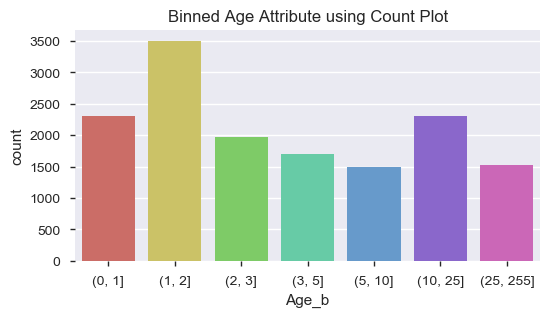

In [238]:
# histogram plot for the binned data 
count, ax = plt.subplots(figsize=(6,3))
sns.countplot(x = 'Age_b', data = data_r2, palette = 'hls')
plt.title('Binned Age Attribute using Count Plot')
plt.show()

In [239]:
## Creating the Age_bin Variable
data_r2['Age_bin'] = pd.cut(x=data_r2['Age'], bins=[0, 1, 2, 3, 5, 10, 25, 500], labels=['1','2','3','5','10','25','255'])

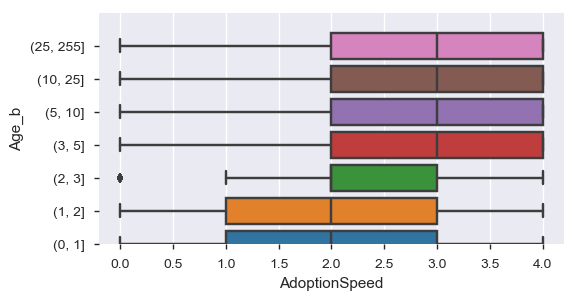

<Figure size 300x300 with 0 Axes>

In [240]:
# Box and Whisker plot for the Age_binned variable
count, ax = plt.subplots(figsize=(6,3))
fig = sns.boxplot(x='AdoptionSpeed', y="Age_b", data=data_r2)
fig.axis(ymin=0, ymax=7)
plt.figure(figsize=(3,3));

In [241]:
## Looking at the Age_bin with describe() Function
data_r2.Age_bin.describe()

count     14814
unique        7
top           2
freq       3503
Name: Age_bin, dtype: object

In [242]:
# Creating a new column for the transformed Breed1_t variable
data_r2["Breed1_t"]=data_r2["Breed1"]
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b,Age_bin,Breed1_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,86e1089a3,2,0,0.477121,"(2, 3]",3,299


In [243]:
## Binnng unique values in Breed1 into a total of 4 unique bins 
data_r2.Breed1_t[data_r2.Breed1_t == 307] = 500
data_r2.Breed1_t[data_r2.Breed1_t == 266] = 400

In [244]:
## Binnng unique values in Breed1 into a total of 4 unique bins  
data_r2.Breed1_t[data_r2.Breed1_t <= 240] = 350

In [245]:
## Binnng unique values in Breed1 into a total of 4 unique bins 
data_r2.Breed1_t[data_r2.Breed1_t <= 306] = 325

In [246]:
## Binnng unique values in Breed1 into a total of 4 unique bins 
data_r2.Breed1_t.unique()

array([325, 500, 400, 350], dtype=int64)

In [247]:
## Changing lables to the correct number
data_r2.Breed1_t[data_r2.Breed1_t == 500] = 307
data_r2.Breed1_t[data_r2.Breed1_t == 400] = 266
data_r2.Breed1_t[data_r2.Breed1_t == 325] = 275
data_r2.Breed1_t[data_r2.Breed1_t == 350] = 265

In [248]:
## Making sure the correct labels are listed
data_r2.Breed1_t.unique()

array([275, 307, 266, 265], dtype=int64)

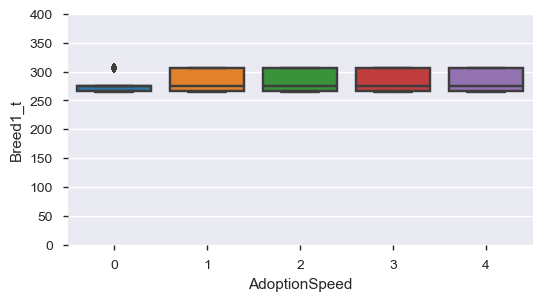

In [249]:
# Box and Whisker plot for the transformed Breeed1_t variable
count, ax = plt.subplots(figsize=(6,3))
fig = sns.boxplot(x='AdoptionSpeed', y="Breed1_t", data=data_r2)
fig.axis(ymin=0, ymax=400);

In [250]:
# Creating a new column for the Binned State Variable
data_r2["State_t"]=data_r2["State"]
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b,Age_bin,Breed1_t,State_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,100,41326,86e1089a3,2,0,0.477121,"(2, 3]",3,275,41326


In [251]:
## Binnng the all values for State variables other than the two most dominant levels
data_r2.State_t[data_r2.State_t == 41324] = 41000
data_r2.State_t[data_r2.State_t == 41325] = 41000
data_r2.State_t[data_r2.State_t == 41327] = 41000
data_r2.State_t[data_r2.State_t == 41330] = 41000
data_r2.State_t[data_r2.State_t == 41332] = 41000
data_r2.State_t[data_r2.State_t == 41335] = 41000
data_r2.State_t[data_r2.State_t == 41336] = 41000
data_r2.State_t[data_r2.State_t == 41342] = 41000
data_r2.State_t[data_r2.State_t == 41345] = 41000
data_r2.State_t[data_r2.State_t == 41361] = 41000
data_r2.State_t[data_r2.State_t == 41367] = 41000
data_r2.State_t[data_r2.State_t == 41415] = 41000
 
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b,Age_bin,Breed1_t,State_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,100,41326,86e1089a3,2,0,0.477121,"(2, 3]",3,275,41326


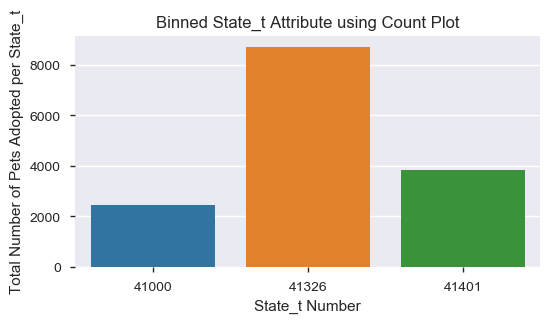

In [252]:
# Bar and count plot for the three factor State_t variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('State_t', data=data_r2)
ax.set_title('Binned State_t Attribute using Count Plot')
ax.set_xlabel('State_t Number')
ax.set_ylabel('Total Number of Pets Adopted per State_t')

plt.show()

In [253]:
# Creating a new column for the new binned Quantity variable
data_r2["Quantity_t"]=data_r2["Quantity"]
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b,Age_bin,Breed1_t,State_t,Quantity_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,41326,86e1089a3,2,0,0.477121,"(2, 3]",3,275,41326,1


In [254]:
## Creating a binary binned Quantity Variable
data_r2.Quantity_t[data_r2.Quantity_t >= 2] = 2
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b,Age_bin,Breed1_t,State_t,Quantity_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,41326,86e1089a3,2,0,0.477121,"(2, 3]",3,275,41326,1


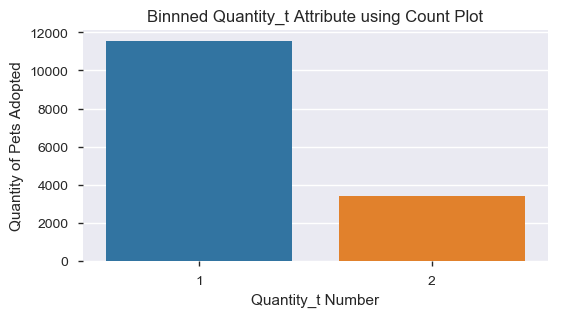

In [255]:
# Bar and Count PLot for the Binned Quantity_t Variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('Quantity_t', data=data_r2)
ax.set_title('Binnned Quantity_t Attribute using Count Plot')
ax.set_xlabel('Quantity_t Number')
ax.set_ylabel('Quantity of Pets Adopted')

plt.show()

In [256]:
# Creating a new column for the new binned Fee variable
data_r2["Fee_t"]=data_r2["Fee"]
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b,Age_bin,Breed1_t,State_t,Quantity_t,Fee_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,86e1089a3,2,0,0.477121,"(2, 3]",3,275,41326,1,100


In [257]:
## Creating a binary binned Fee Variable
data_r2.Fee_t[data_r2.Fee_t > 0] = 1
data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PetID,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b,Age_bin,Breed1_t,State_t,Quantity_t,Fee_t
0,2,Nibble,3,299,0,1,1,7,0,1,...,86e1089a3,2,0,0.477121,"(2, 3]",3,275,41326,1,1


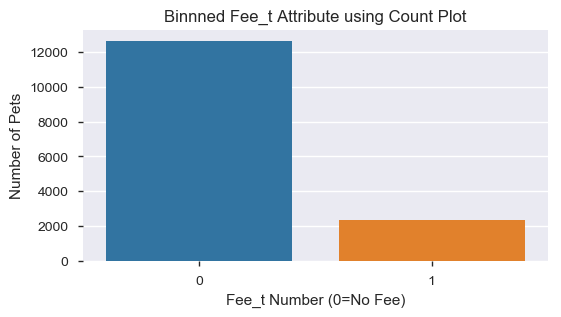

In [258]:
# Bar and Count PLot for the Binned Quantity_t Variable
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('Fee_t', data=data_r2)
ax.set_title('Binnned Fee_t Attribute using Count Plot')
ax.set_xlabel('Fee_t Number (0=No Fee)')
ax.set_ylabel('Number of Pets')

plt.show()

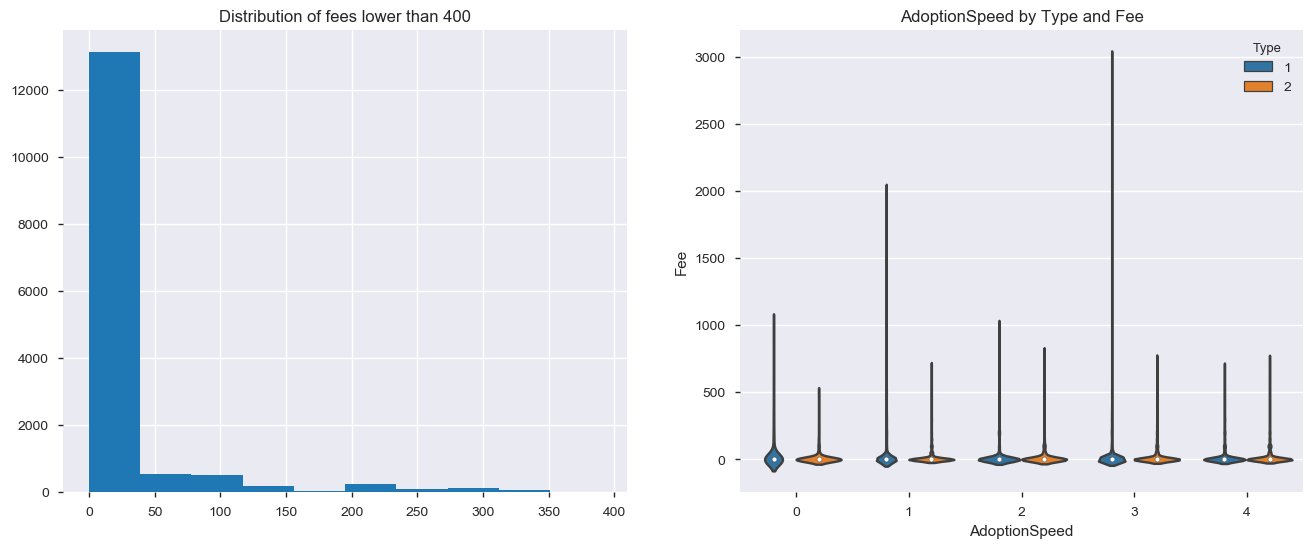

In [259]:
## Creating a count plot and violen plot for fees and type
plt.figure(figsize=(16, 6));
plt.subplot(1, 2, 1)
plt.hist(data_r2.loc[data_r2['Fee'] < 400, 'Fee']);
plt.title('Distribution of fees lower than 400');

plt.subplot(1, 2, 2)
sns.violinplot(x="AdoptionSpeed", y="Fee", hue="Type", data=data_r2);
plt.title('AdoptionSpeed by Type and Fee');

In [260]:
## Calculating the number of mixed vs pure breeds
data_r2['Pure_breed'] = 0
data_r2.loc[data_r2['Breed2'] == 0, 'Pure_breed'] = 1

data_r2['Pure_breed'] = 0
data_r2.loc[data_r2['Breed2'] == 0, 'Pure_breed'] = 1

print(f"Rate of pure breed pets in train data: {data_r2['Pure_breed'].sum() * 100 / data_r2['Pure_breed'].shape[0]:.4f}%.")


Rate of pure breed pets in train data: 71.7802%.


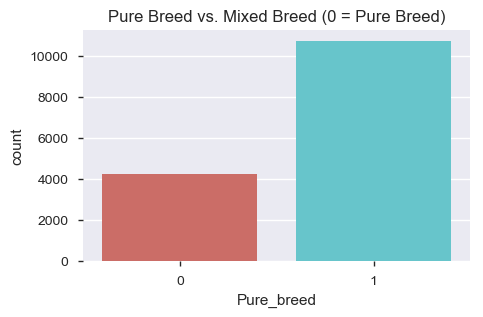

In [261]:
#draw histogram plot for the binned data of breed type
count, ax = plt.subplots(figsize=(5,3))
sns.countplot(x = 'Pure_breed', data = data_r2, palette = 'hls')
plt.title('Pure Breed vs. Mixed Breed (0 = Pure Breed)')
plt.show()

In [428]:
import pandas_profiling

trans=data_r2[['Age_t', 'Age_bin', 'Breed1_t', 'State_t', 'Quantity_t', 'AdoptionSpeed_t', 'Pure_breed', 'Fee', 'Fee_t']]

pandas_profiling.ProfileReport(trans)

Number of variables,9
Number of observations,14993
Total Missing (%),0.1%
Total size in memory,952.1 KiB
Average record size in memory,65.0 B
Numeric,4
Categorical,1
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [263]:
## Saving Output file to CSV
submit=pd.DataFrame(data=data_r2)
submit.to_csv('05oct_A.csv',index= True)

In [572]:
## uploading the pet adoption csv file
sep = pd.read_csv('C:/Users/jlpar/Documents/Springboard Curriculum/Data/petadoption/petfinder-adoption-prediction/05oct_A.csv')
sep.head(3)

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,AdoptionSpeed,AdoptionSpeed_t,AdoptionSpeed_t2,Age_t,Age_b,Age_bin,Breed1_t,Fee_t,Quantity_t,State_t
0,1,1,173,96,3,1,2,7,2,2,...,2,0,0,0.0,"(0, 1]",1,265,1,2,41000
1,1,1,218,205,3,1,5,7,2,2,...,1,0,0,0.0,"(0, 1]",1,265,0,2,41326
2,1,1,70,307,2,1,5,0,2,1,...,1,0,0,0.0,"(0, 1]",1,265,0,1,41326


In [573]:
# Shape of the Data and creating a sample size of 100%
 
data_s=sep.sample(frac=1, random_state=99)
data_s.shape

(14993, 27)

In [574]:
# Checking the Column Headers
data_r3=data_s
data_r3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 5936 to 12929
Data columns (total 27 columns):
Type                14993 non-null int64
Age                 14993 non-null int64
Breed1              14993 non-null int64
Breed2              14993 non-null int64
Gender              14993 non-null int64
Color1              14993 non-null int64
Color2              14993 non-null int64
Color3              14993 non-null int64
MaturitySize        14993 non-null int64
FurLength           14993 non-null int64
Vaccinated          14993 non-null int64
Dewormed            14993 non-null int64
Sterilized          14993 non-null int64
Health              14993 non-null int64
Quantity            14993 non-null int64
Fee                 14993 non-null int64
State               14993 non-null int64
AdoptionSpeed       14993 non-null int64
AdoptionSpeed_t     14993 non-null int64
AdoptionSpeed_t2    14993 non-null int64
Age_t               14993 non-null float64
Age_b               14993

In [575]:
## Creating the original Dataset for these models
data_r4 = data_s[['Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
                   'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Type','AdoptionSpeed', 'AdoptionSpeed_t']]
data_r4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 5936 to 12929
Data columns (total 19 columns):
Age                14993 non-null int64
Breed1             14993 non-null int64
Breed2             14993 non-null int64
Gender             14993 non-null int64
Color1             14993 non-null int64
Color2             14993 non-null int64
Color3             14993 non-null int64
MaturitySize       14993 non-null int64
FurLength          14993 non-null int64
Vaccinated         14993 non-null int64
Dewormed           14993 non-null int64
Sterilized         14993 non-null int64
Health             14993 non-null int64
Quantity           14993 non-null int64
Fee                14993 non-null int64
State              14993 non-null int64
Type               14993 non-null int64
AdoptionSpeed      14993 non-null int64
AdoptionSpeed_t    14993 non-null int64
dtypes: int64(19)
memory usage: 2.3 MB


In [576]:
## Checking the dataframe
data_r4.head()

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Type,AdoptionSpeed,AdoptionSpeed_t
5936,1,265,0,1,1,0,0,2,2,2,2,2,1,1,0,41336,2,1,0
10788,2,307,0,2,4,0,0,2,1,2,1,2,1,1,0,41401,1,2,0
859,7,44,307,2,2,5,7,2,2,1,1,1,1,1,0,41401,1,4,1
13924,24,307,0,2,5,7,0,2,1,1,1,2,1,1,50,41326,1,4,1
11420,2,307,141,1,2,7,0,2,2,2,2,2,1,1,0,41401,1,1,0


In [577]:
############## Creating the Baseline model for the mulitlevel and Binary Target variable

In [578]:
# separating our independent and dependent variable
X = data_r4.drop(['AdoptionSpeed', 'AdoptionSpeed_t'], axis = 1)
y = data_r4["AdoptionSpeed"]

In [579]:
# Create standardizer
standardizer = StandardScaler()

# Create logistic regression
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

In [580]:
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [581]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [582]:
# Calculate mean
cv_results.mean()

0.3366239270624861

In [583]:
########################################################################################################

In [584]:
# separating our independent and dependent variable
X = data_r4.drop(['AdoptionSpeed', 'AdoptionSpeed_t'], axis = 1)
y = data_r4["AdoptionSpeed_t"]

In [585]:
# Create standardizer
standardizer = StandardScaler()

# Create logistic regression
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

In [586]:
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [587]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="f1", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [588]:
# Calculate mean
cv_results.mean()

0.11498859931198395

In [589]:
##################################################################

In [590]:
## Creating the original Dataset for these models
data_r4B = data_s[['Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
                   'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Type','AdoptionSpeed_t']]
data_r4B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 5936 to 12929
Data columns (total 18 columns):
Age                14993 non-null int64
Breed1             14993 non-null int64
Breed2             14993 non-null int64
Gender             14993 non-null int64
Color1             14993 non-null int64
Color2             14993 non-null int64
Color3             14993 non-null int64
MaturitySize       14993 non-null int64
FurLength          14993 non-null int64
Vaccinated         14993 non-null int64
Dewormed           14993 non-null int64
Sterilized         14993 non-null int64
Health             14993 non-null int64
Quantity           14993 non-null int64
Fee                14993 non-null int64
State              14993 non-null int64
Type               14993 non-null int64
AdoptionSpeed_t    14993 non-null int64
dtypes: int64(18)
memory usage: 2.2 MB


In [591]:
# separating our independent and dependent variable
X = data_r4B.drop(['AdoptionSpeed_t'], axis = 1)
y = data_r4B["AdoptionSpeed_t"]

In [592]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 0)

In [593]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features:   ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features:   ', X_test.shape[1])

Training Set:
Number of datapoints:  9745
Number of features:    17


Test Set:
Number of datapoints:  5248
Number of features:    17


In [594]:
##################################  MODELS #######################################

In [595]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [596]:
############################################################################################

In [597]:
# Initiate 7 classifier models
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
ext = ExtraTreesClassifier(random_state=1)
svc = SVC(probability=True)
ada = AdaBoostClassifier()
gpc = GaussianProcessClassifier()


# Prepare lists
models = [ran, knn, log, ext, svc, ada, gpc,]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_test, y_test, scoring = "f1", cv = 5)
    scores.append(acc.mean())

In [598]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Base Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'AdaBoost','Extra Trees','Gaussian Process'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(7)

,Base Model,Score
0,Extra Trees,0.363454
1,Gaussian Process,0.363448
2,Random Forest,0.347795
3,K Nearest Neighbour,0.347248
4,SVC,0.336771
5,AdaBoost,0.203014
6,Logistic Regression,0.070189


(0.0, 0.45)

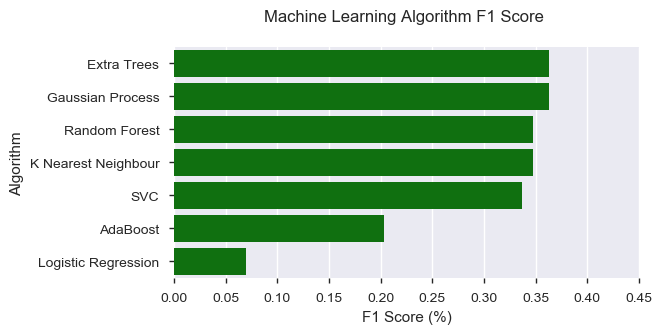

In [599]:
# Plot results for f1 scores
count, ax = plt.subplots(figsize=(6,3))
sns.barplot(x='Score', y = 'Base Model', data = result_df, color = 'green')
plt.title('Machine Learning Algorithm F1 Score \n')
plt.xlabel('F1 Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.0, 0.45)

In [600]:
# Building feature importance into a DataFrame
fi = {'Features':X.columns.tolist(), 'Importance':ran.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [601]:
# Plot results
print(importance)

        Features  Importance
0            Age    0.183755
1         Breed1    0.098583
4         Color1    0.085535
5         Color2    0.080557
15         State    0.074992
2         Breed2    0.054051
14           Fee    0.050793
11    Sterilized    0.048880
13      Quantity    0.048840
3         Gender    0.044383
7   MaturitySize    0.044227
6         Color3    0.042111
8      FurLength    0.041861
10      Dewormed    0.039495
9     Vaccinated    0.037735
12        Health    0.014130
16          Type    0.010073


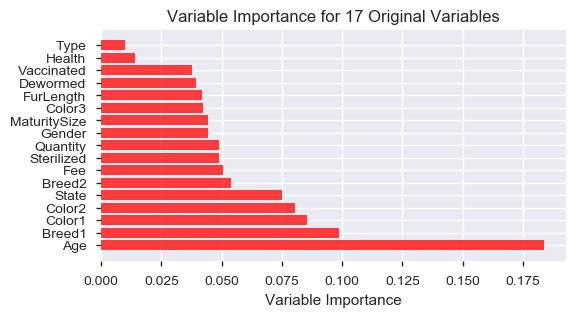

In [602]:
count, ax = plt.subplots(figsize=(6,3))
plt.barh(importance.Features, importance.Importance, align='center', alpha=0.75, color='red')
plt.xlabel('Variable Importance')
plt.title('Variable Importance for 17 Original Variables')

plt.show()

In [603]:
###############################################################################

In [604]:
## Creating a new data set for analysis
data_r5 = data_s[['Age_bin', 'Color2', 'Breed1', 'State_t', 'MaturitySize', 
                  'FurLength', 'Quantity_t', 'Fee_t', 'Type', 'AdoptionSpeed_t']]
data_r5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 5936 to 12929
Data columns (total 10 columns):
Age_bin            14993 non-null int64
Color2             14993 non-null int64
Breed1             14993 non-null int64
State_t            14993 non-null int64
MaturitySize       14993 non-null int64
FurLength          14993 non-null int64
Quantity_t         14993 non-null int64
Fee_t              14993 non-null int64
Type               14993 non-null int64
AdoptionSpeed_t    14993 non-null int64
dtypes: int64(10)
memory usage: 1.3 MB


In [605]:
# separating our independent and dependent variable
X = data_r5.drop(['AdoptionSpeed_t'], axis = 1)
y = data_r5["AdoptionSpeed_t"]

In [606]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 0)

In [607]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features:   ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features:   ', X_test.shape[1])

Training Set:
Number of datapoints:  9745
Number of features:    9


Test Set:
Number of datapoints:  5248
Number of features:    9


In [608]:
## Baseline Logistic Model for Select Eight Attributes
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [609]:
## Calculating the Accuracy of the Model
y_pred = logreg.predict(X_test)
 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [610]:
## Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3722   70]
 [1354  102]]


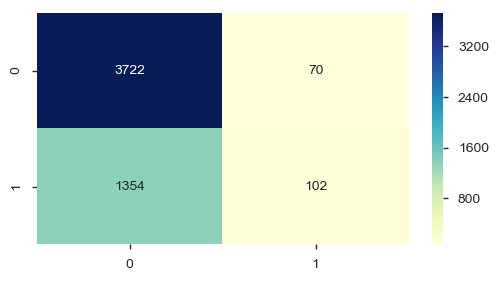

In [611]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(6,3))
sns.heatmap(confusion_matrix,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

In [612]:
## Logistic Classification Report for the Precision, Recall and F1 Score
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.98      0.84      3792
          1       0.59      0.07      0.13      1456

avg / total       0.69      0.73      0.64      5248



In [613]:
#####################################################################################

In [614]:
# Initiate models for the select 7
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gpc = GaussianProcessClassifier()
 

# Lists
models = [ran, knn, log, svc, ext, ada, gpc,]         
scores_v2 = []

# Fit & cross validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_test, y_test, scoring = "f1", cv = 5)
    scores_v2.append(acc.mean())

In [615]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Models': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Process'],
    '1st Optimized Score': scores_v2})

result_df = results.sort_values(by='1st Optimized Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Models,1st Optimized Score
0,Random Forest,0.371829
1,Gaussian Process,0.365062
2,K Nearest Neighbour,0.357906
3,Extra Trees,0.352403
4,AdaBoost,0.329284
5,SVC,0.301422
6,Logistic Regression,0.124142


In [616]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Base Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'AdaBoost','Extra Trees','Gaussian Process'],
    'Score': scores,
    'Models': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Process'],
    '1st Optimization': scores_v2})

result_df = results.sort_values(by='1st Optimization', ascending=False).reset_index(drop=True)
result_df.head(11)

,Base Model,Score,Models,1st Optimization
0,Random Forest,0.347795,Random Forest,0.371829
1,Gaussian Process,0.363448,Gaussian Process,0.365062
2,K Nearest Neighbour,0.347248,K Nearest Neighbour,0.357906
3,AdaBoost,0.203014,Extra Trees,0.352403
4,Extra Trees,0.363454,AdaBoost,0.329284
5,SVC,0.336771,SVC,0.301422
6,Logistic Regression,0.070189,Logistic Regression,0.124142


(0, 0.42)

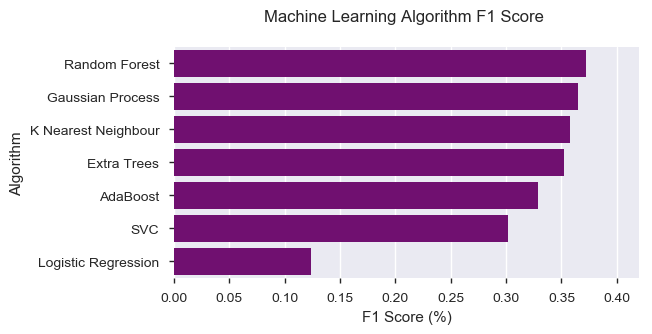

In [617]:
# Plot results
count, ax = plt.subplots(figsize=(6,3))
sns.barplot(x='1st Optimization', y = 'Models', data = result_df, color = 'purple')
plt.title('Machine Learning Algorithm F1 Score \n')
plt.xlabel('F1 Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0, 0.42)

In [618]:
# Building feature importance into a DataFrame
fi = {'Features':X.columns.tolist(), 'Importance':ran.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [619]:
print(importance)

       Features  Importance
2        Breed1    0.231167
0       Age_bin    0.221576
1        Color2    0.191101
3       State_t    0.089117
4  MaturitySize    0.087230
5     FurLength    0.076756
7         Fee_t    0.046673
6    Quantity_t    0.039244
8          Type    0.017137


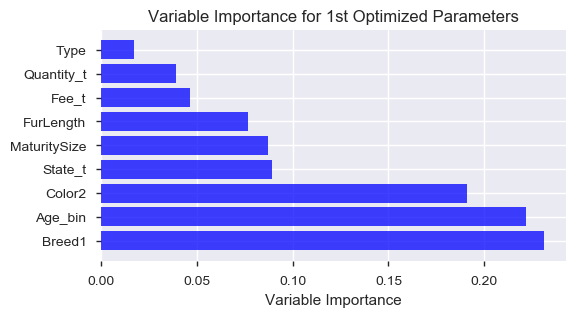

In [620]:
## Creating a variable importance plot
count, ax = plt.subplots(figsize=(6,3))
plt.barh(importance.Features, importance.Importance, align='center', alpha=0.75, color='blue')
plt.xlabel('Variable Importance')
plt.title('Variable Importance for 1st Optimized Parameters')

plt.show()

In [621]:
####################################################################################

In [622]:
## Creating the eight variable Dataset for these models
data_r6 = data_s[['Age_bin', 'Color2', 'Breed1', 'State_t', 'MaturitySize', 
                  'FurLength', 'Quantity_t', 'Fee_t', 'AdoptionSpeed_t']]
data_r6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 5936 to 12929
Data columns (total 9 columns):
Age_bin            14993 non-null int64
Color2             14993 non-null int64
Breed1             14993 non-null int64
State_t            14993 non-null int64
MaturitySize       14993 non-null int64
FurLength          14993 non-null int64
Quantity_t         14993 non-null int64
Fee_t              14993 non-null int64
AdoptionSpeed_t    14993 non-null int64
dtypes: int64(9)
memory usage: 1.1 MB


In [623]:
#Taking a 35% sample to test models
data_r6=data_r6.sample(frac=0.35, random_state=99)

In [624]:
# separating our independent and dependent variable
X = data_r6.drop(['AdoptionSpeed_t'], axis = 1)
y = data_r6["AdoptionSpeed_t"]

In [625]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state = 0)

In [626]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features:   ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features:   ', X_test.shape[1])

Training Set:
Number of datapoints:  3148
Number of features:    8


Test Set:
Number of datapoints:  2100
Number of features:    8


In [627]:
# SVM Parameter's to search
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

# Setting up parameter grid
hyperparams = {'C': Cs, 'gamma' : gammas}

# Run GridSearch CV
gdSVM=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "f1")

# Fitting model and return results
gdSVM.fit(X_train, y_train)
SVM_best=gdSVM.best_estimator_

print(gdSVM.best_score_)
print(gdSVM.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.2min finished


0.4004798656957999
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [629]:
## Calculating the best score
gdSVM.best_score_

0.4004798656957999

In [630]:
# Logistic Regression Parameter's to search
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# Setting up parameter grid
hyperparams = {'penalty': penalty, 'C': C}

# Run GridSearch CV
gdlog=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "f1")

# Fitting model and return results
gdlog.fit(X_train, y_train)
log_best=gdlog.best_estimator_

print(gdlog.best_score_)
print(gdlog.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.070388954437392
LogisticRegression(C=59.94842503189409, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished


In [631]:
# Best score
gdlog.best_score_

0.070388954437392

In [632]:
# Gaussian Parameter's to search
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

# Setting up parameter grid
hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

# Run GridSearch CV
gdGAUS=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "f1")

# Fitting model and return results
gdGAUS.fit(X_train, y_train)
GAUS_best=gdlog.best_estimator_

print(gdGAUS.best_score_)
print(gdGAUS.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 22.5min finished


0.40101196226288854
GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=1,
             multi_class='one_vs_rest', n_jobs=1, n_restarts_optimizer=0,
             optimizer='fmin_l_bfgs_b', random_state=None,
             warm_start=False)


In [633]:
## Calculating the best score
gdGAUS.best_score_

0.40101196226288854

In [634]:
# Ada Boost Parameter's to search
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Run GridSearch CV
gdADB=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "f1")

# Fitting model and return results
gdADB.fit(X_train, y_train)
ADB_best=gdADB.best_estimator_

print(gdADB.best_score_)
print(gdADB.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
0.4368497918299426
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=2,
          n_estimators=10, random_state=None)


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   55.2s finished


In [635]:
## Calculating the best score
gdADB.best_score_

0.4368497918299426

In [636]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

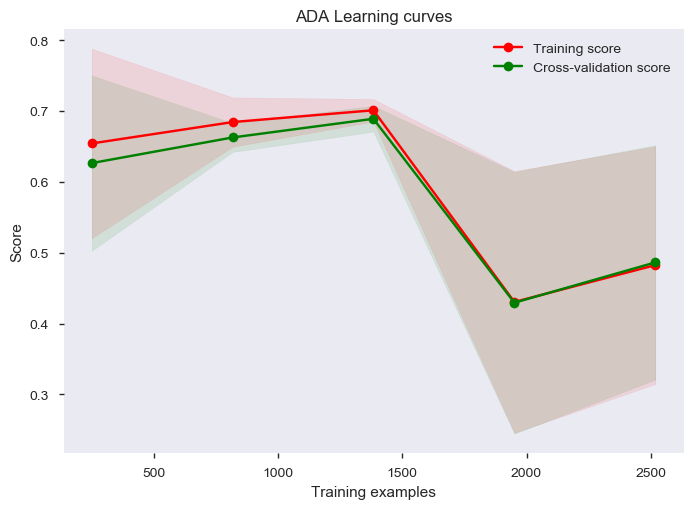

In [637]:
## Plotting Learning Curves
g = plot_learning_curve(gdADB.best_estimator_,"ADA Learning curves",X_train, y_train,cv=kfold)

In [638]:
# KNN Parameter's to search
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# Setting up parameter grid
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

# Run GridSearch CV
gdKNN=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "f1")

# Fitting model and return results
gdKNN.fit(X_train, y_train)
KNN_best=gdKNN.best_estimator_

print(gdKNN.best_score_)
print(gdKNN.best_estimator_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
0.4083837059165151
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.3min finished


In [639]:
## Calculating the best score
gdKNN.best_score_

0.4083837059165151

In [640]:
# Random Forest Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 8]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gdRF=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "f1",)

# Fitting model and return results
gdRF.fit(X_train, y_train)
RF_best=gdRF.best_estimator_

print(gdRF.best_score_)
print(gdRF.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.41420059376374196
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 10.3min finished


In [641]:
## Calculating the best score
gdRF.best_score_

0.41420059376374196

In [642]:
## Setting up confusion Matrix 
y_pred4 = gdRF.predict(X_test)

In [643]:
#Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_test, y_pred4)
print(confusion_matrix3)

[[1314  200]
 [ 392  194]]


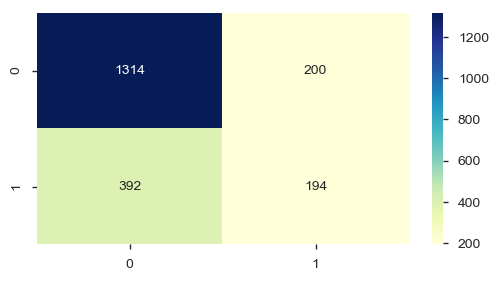

In [644]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(6,3))
sns.heatmap(confusion_matrix3,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

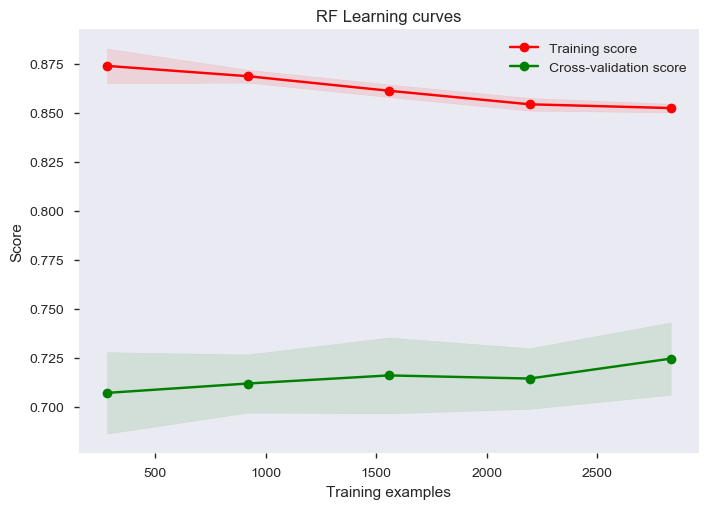

In [645]:
# Cross validate model with Kfold stratified cross val for learning curve
kfold = StratifiedKFold(n_splits=10)
g = plot_learning_curve(gdRF.best_estimator_,"RF Learning curves",X_train, y_train,cv=kfold)

In [646]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 8]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gdXTREE=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "f1")

# Fitting model and return results
gdXTREE.fit(X_train, y_train)
gdXTREE.best_score_
print(gdXTREE.best_score_)
print(gdXTREE.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  8.5min finished


0.39915429977361166
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [647]:
## Calculating the best score
gdXTREE.best_score_

0.39915429977361166

In [648]:
## Creating predict to generate Matrix
y_pred5 = gdXTREE.predict(X_test)

In [649]:
#Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix5 = confusion_matrix(y_test, y_pred5)
print(confusion_matrix5)

[[1316  198]
 [ 393  193]]


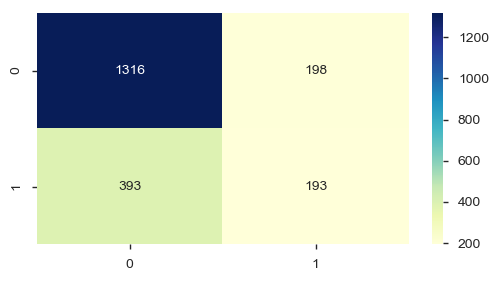

In [650]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(6,3))
sns.heatmap(confusion_matrix5,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

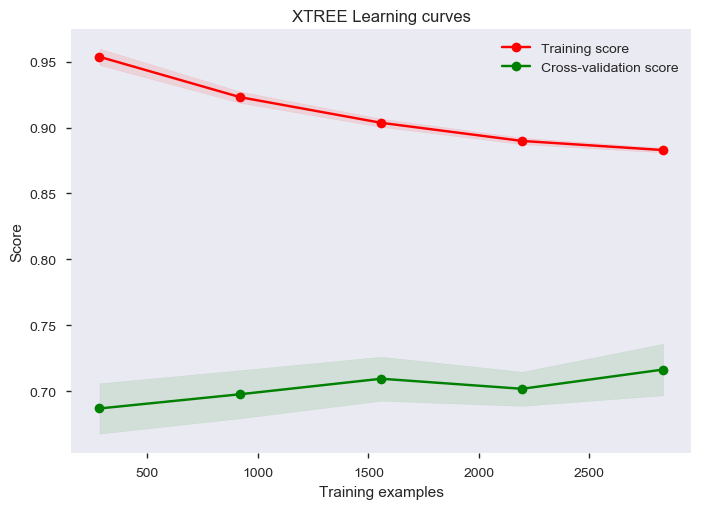

In [651]:
## Plotting the Learning Curve
g = plot_learning_curve(gdXTREE.best_estimator_,"XTREE Learning curves",X_train, y_train,cv=kfold)

In [652]:
## Test Set Results 
results_ = pd.DataFrame({
    'Models_B': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'AdaBoost', 'Gaussian', 'Xtree Trees'],
    'Final Optimization': [gdRF.best_score_, gdKNN.best_score_, gdlog.best_score_, gdSVM.best_score_,
              gdADB.best_score_, gdGAUS.best_score_, gdXTREE.best_score_]})
result_df = results_.sort_values(by='Final Optimization', ascending=False)
result_df.head(11)

,Models_B,Final Optimization
4,AdaBoost,0.436850
0,Random Forest,0.414201
1,K Nearest Neighbour,0.408384
5,Gaussian,0.401012
3,SVC,0.400480
6,Xtree Trees,0.399154
2,Logistic Regression,0.070389


In [653]:
## Test Set Results 
results_ = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'AdaBoost','Extra Trees','Gaussian Process'],
    'Score': scores,
    'Models': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Process'],
    '1st Optimization': scores_v2,
    'Models_B': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'SVC', 'AdaBoost', 'Gaussian', 'Xtree Trees'],
    'Final Optimization': [gdRF.best_score_, gdKNN.best_score_, gdlog.best_score_, gdSVM.best_score_,
              gdADB.best_score_, gdGAUS.best_score_, gdXTREE.best_score_]})
result_df = results_.sort_values(by='Final Optimization', ascending=False)
result_df.head(11)

,Model,Score,Models,1st Optimization,Models_B,Final Optimization
4,AdaBoost,0.203014,Extra Trees,0.352403,AdaBoost,0.436850
0,Random Forest,0.347795,Random Forest,0.371829,Random Forest,0.414201
1,K Nearest Neighbour,0.347248,K Nearest Neighbour,0.357906,K Nearest Neighbour,0.408384
5,Extra Trees,0.363454,AdaBoost,0.329284,Gaussian,0.401012
3,SVC,0.336771,SVC,0.301422,SVC,0.400480
6,Gaussian Process,0.363448,Gaussian Process,0.365062,Xtree Trees,0.399154
2,Logistic Regression,0.070189,Logistic Regression,0.124142,Logistic Regression,0.070389


In [654]:
############## Final Run for Best Model with all the datapoints

In [655]:

## Creating the original Dataset for these models with only eight variables
data_r7 = data_s[['Age_bin', 'Color2', 'Breed1', 'State_t', 'MaturitySize', 
                  'FurLength', 'Quantity_t', 'Fee_t', 'AdoptionSpeed_t']]

data_r7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 5936 to 12929
Data columns (total 9 columns):
Age_bin            14993 non-null int64
Color2             14993 non-null int64
Breed1             14993 non-null int64
State_t            14993 non-null int64
MaturitySize       14993 non-null int64
FurLength          14993 non-null int64
Quantity_t         14993 non-null int64
Fee_t              14993 non-null int64
AdoptionSpeed_t    14993 non-null int64
dtypes: int64(9)
memory usage: 1.1 MB


In [656]:
#Taking a 100% sample to test models
data_r7=data_r7.sample(frac=1, random_state=99)

In [657]:
# separating our independent and dependent variable
X = data_r7.drop(['AdoptionSpeed_t'], axis = 1)
y = data_r7["AdoptionSpeed_t"]

In [658]:
## Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [659]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features:   ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features:   ', X_test.shape[1])

Training Set:
Number of datapoints:  9745
Number of features:    8


Test Set:
Number of datapoints:  5248
Number of features:    8


In [660]:
## Setting up the random forest with a balanced approach
rf=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [661]:
## Fitting the model
model=rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [662]:
# Building feature importance into a DataFrame
fi = {'Features':X.columns.tolist(), 'Importance':model.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [663]:
## Printing Variable Importance 
print(importance)

       Features  Importance
0       Age_bin    0.307179
2        Breed1    0.234060
1        Color2    0.155101
3       State_t    0.084994
5     FurLength    0.068692
4  MaturitySize    0.063656
6    Quantity_t    0.049142
7         Fee_t    0.037176


In [664]:
## Calculating the best score
model.oob_score_

0.6849666495638789

In [665]:
## Printing the results 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[2714 1040]
 [ 624  870]]
             precision    recall  f1-score   support

          0       0.81      0.72      0.77      3754
          1       0.46      0.58      0.51      1494

avg / total       0.71      0.68      0.69      5248

0.6829268292682927
0.5111633372502938


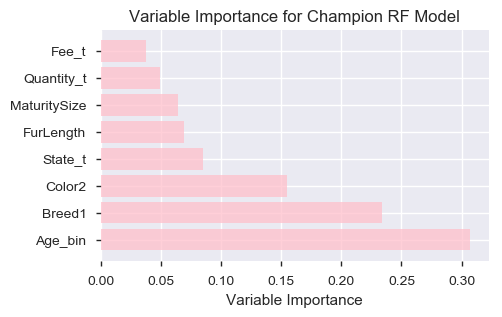

In [666]:
## Printing the Variable Importance Results 
count, ax = plt.subplots(figsize=(5,3))
plt.barh(importance.Features, importance.Importance, align='center', alpha=0.75, color='pink')
plt.xlabel('Variable Importance')
plt.title('Variable Importance for Champion RF Model')

plt.show()

In [667]:
## Calcuating the Confusion Matrix 
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[2714, 1040],
       [ 624,  870]], dtype=int64)

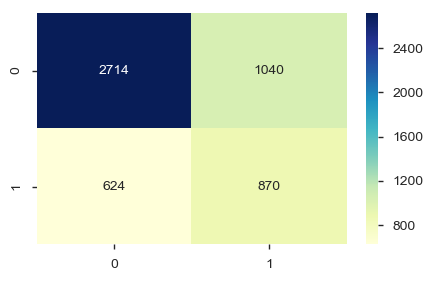

In [668]:
# visualize the confusion matrix with seaborn library
count, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix,annot=True,fmt="d", cmap="YlGnBu") 
plt.show()

In [669]:
## RF Classification Report for the Precision, Recall and F1 Score
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.72      0.77      3754
          1       0.46      0.58      0.51      1494

avg / total       0.71      0.68      0.69      5248



In [670]:
################# Survival Analysis Models ###############################################

In [671]:
## Creating the original Dataset for these the survival models
surv = sep[['Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'Breed1_t', 'Quantity_t',
                   'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Type', 'AdoptionSpeed']]
surv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 20 columns):
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
Breed1_t         14993 non-null int64
Quantity_t       14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
Type             14993 non-null int64
AdoptionSpeed    14993 non-null int64
dtypes: int64(20)
memory usage: 2.3 MB


In [672]:
# Creating another column for the new binned AdoptionSpeed variable
surv["AdoptionSpeed_t"]=surv["AdoptionSpeed"]
surv.head(1)

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,Breed1_t,Quantity_t,...,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Type,AdoptionSpeed,AdoptionSpeed_t
0,1,173,96,3,1,2,7,2,265,2,...,2,2,2,1,9,100,41335,1,2,2


In [673]:
## Binnng the AdoptionSpeed Category into a binary data set
surv.AdoptionSpeed_t[surv.AdoptionSpeed == 0] = 1
surv.AdoptionSpeed_t[surv.AdoptionSpeed == 1] = 1
surv.AdoptionSpeed_t[surv.AdoptionSpeed == 2] = 1
surv.AdoptionSpeed_t[surv.AdoptionSpeed == 3] = 1
surv.AdoptionSpeed_t[surv.AdoptionSpeed == 4] = 0

data_r2.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,AdoptionSpeed,AdoptionSpeed_t,Age_t,Age_b,Age_bin,Breed1_t,State_t,Quantity_t,Fee_t,Pure_breed
0,2,Nibble,3,299,0,1,1,7,0,1,...,2,0,0.477121,"(2, 3]",3,275,41326,1,1,1


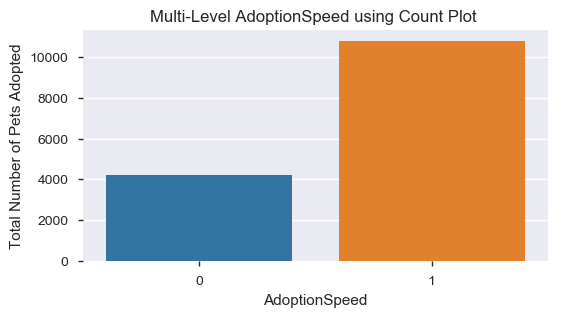

In [674]:
 # Printing the Bar and Count Plot for the new Binned AdoptionSpeed_t variable. 
count, ax = plt.subplots(figsize=(6,3))
ax = sns.countplot('AdoptionSpeed_t', data=surv)
ax.set_title('Multi-Level AdoptionSpeed using Count Plot ')
ax.set_xlabel('AdoptionSpeed')
ax.set_ylabel('Total Number of Pets Adopted')

plt.show()

In [675]:
## Creating the original Dataset for these models
surv1 = surv[['Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
                   'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Type', 'AdoptionSpeed_t']]
surv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 18 columns):
Age                14993 non-null int64
Breed1             14993 non-null int64
Breed2             14993 non-null int64
Gender             14993 non-null int64
Color1             14993 non-null int64
Color2             14993 non-null int64
Color3             14993 non-null int64
MaturitySize       14993 non-null int64
FurLength          14993 non-null int64
Vaccinated         14993 non-null int64
Dewormed           14993 non-null int64
Sterilized         14993 non-null int64
Health             14993 non-null int64
Quantity           14993 non-null int64
Fee                14993 non-null int64
State              14993 non-null int64
Type               14993 non-null int64
AdoptionSpeed_t    14993 non-null int64
dtypes: int64(18)
memory usage: 2.1 MB


In [676]:
## Creating the select Dataset for these models
surv2 = surv[['Age', 'MaturitySize', 'Gender', 'Health', 'Color1', 'Quantity_t',
                  'FurLength', 'Sterilized', 'Vaccinated', 'Type', 'Breed1_t', 'AdoptionSpeed_t']]
surv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 12 columns):
Age                14993 non-null int64
MaturitySize       14993 non-null int64
Gender             14993 non-null int64
Health             14993 non-null int64
Color1             14993 non-null int64
Quantity_t         14993 non-null int64
FurLength          14993 non-null int64
Sterilized         14993 non-null int64
Vaccinated         14993 non-null int64
Type               14993 non-null int64
Breed1_t           14993 non-null int64
AdoptionSpeed_t    14993 non-null int64
dtypes: int64(12)
memory usage: 1.4 MB


In [677]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object

In [678]:
# Setting up Age as the Column and AdoptionSpeed_t as Event for the Cox model
cph.fit(surv2, 'Age', event_col='AdoptionSpeed_t')   ## Fit the data to train the model
cph.print_summary()    ## looking at the significance of the features

<lifelines.CoxPHFitter: fitted with 14993 observations, 4197 censored>
      duration col = 'Age'
         event col = 'AdoptionSpeed_t'
number of subjects = 14993
  number of events = 10796
partial log-likelihood = -93694.80
  time fit was run = 2019-10-06 19:39:40 UTC

---
              coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
MaturitySize -0.21      0.81      0.02 -11.80 <0.005    104.41       -0.24       -0.17
Gender        0.07      1.07      0.02   4.00 <0.005     13.98        0.04        0.10
Health       -0.52      0.59      0.05  -9.90 <0.005     74.41       -0.62       -0.42
Color1       -0.04      0.96      0.01  -6.61 <0.005     34.61       -0.05       -0.03
Quantity_t    0.14      1.15      0.03   4.96 <0.005     20.45        0.09        0.20
FurLength    -0.12      0.88      0.02  -7.75 <0.005     46.64       -0.15       -0.09
Sterilized    0.27      1.31      0.02  16.40 <0.005    198.40        0.24        0.30
Vaccinated    0.08      1.09

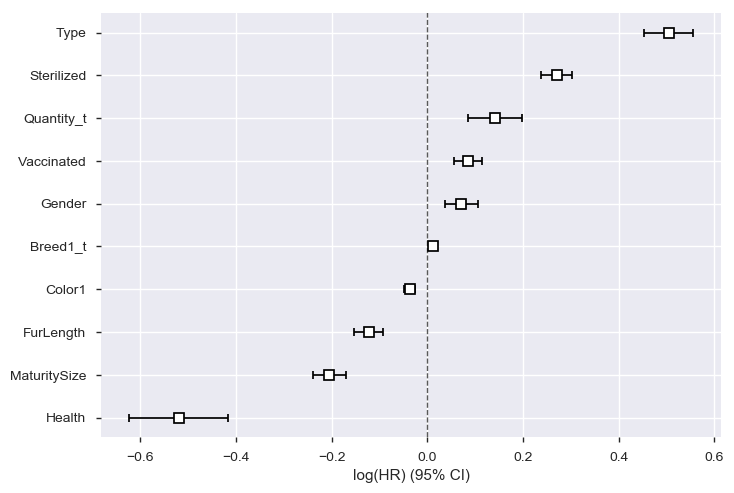

In [679]:
## Coef. Plot for the selected attributes
cph.plot()

In [680]:
# Correlation Matrix Score for this model
print(cph.score_)

0.6488511634877306


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                   test_statistic      p  -log2(p)
Breed1_t     km            231.71 <0.005    171.40
             rank          248.35 <0.005    183.46
Color1       km             43.97 <0.005     34.80
             rank           42.34 <0.005     33.60
FurLeng

KeyboardInterrupt: 

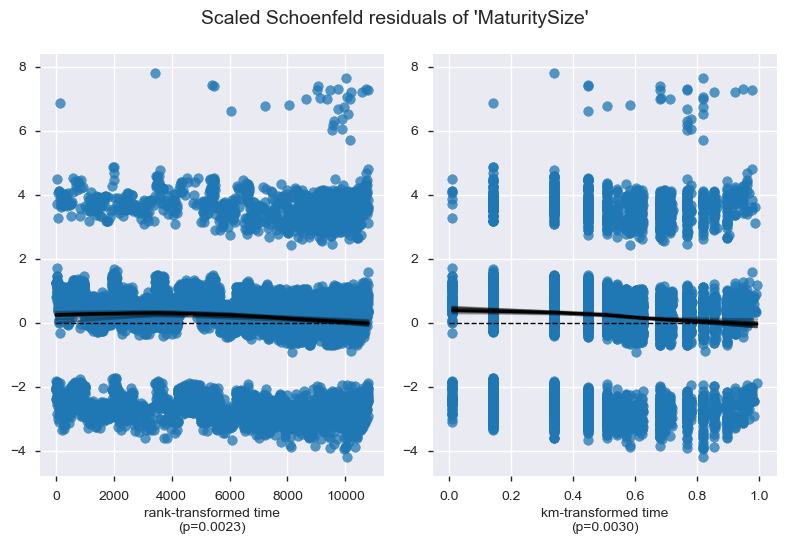

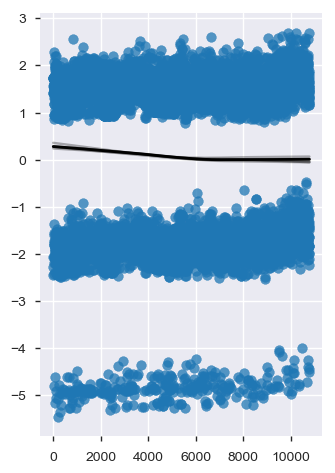

In [681]:
## Please note the graphs are not downloading and it needs to be interupted
cph.check_assumptions(surv2, p_value_threshold=0.05, show_plots=True)


In [682]:
# Setting up Age as the Column and AdoptionSpeed as Event for the Cox model
cph.fit(surv2, 'Age', event_col='AdoptionSpeed_t')   ## Fit the data to train the model
cph.print_summary()    ## looking at the significance of the features

<lifelines.CoxPHFitter: fitted with 14993 observations, 4197 censored>
      duration col = 'Age'
         event col = 'AdoptionSpeed_t'
number of subjects = 14993
  number of events = 10796
partial log-likelihood = -93694.80
  time fit was run = 2019-10-06 19:50:20 UTC

---
              coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
MaturitySize -0.21      0.81      0.02 -11.80 <0.005    104.41       -0.24       -0.17
Gender        0.07      1.07      0.02   4.00 <0.005     13.98        0.04        0.10
Health       -0.52      0.59      0.05  -9.90 <0.005     74.41       -0.62       -0.42
Color1       -0.04      0.96      0.01  -6.61 <0.005     34.61       -0.05       -0.03
Quantity_t    0.14      1.15      0.03   4.96 <0.005     20.45        0.09        0.20
FurLength    -0.12      0.88      0.02  -7.75 <0.005     46.64       -0.15       -0.09
Sterilized    0.27      1.31      0.02  16.40 <0.005    198.40        0.24        0.30
Vaccinated    0.08      1.09

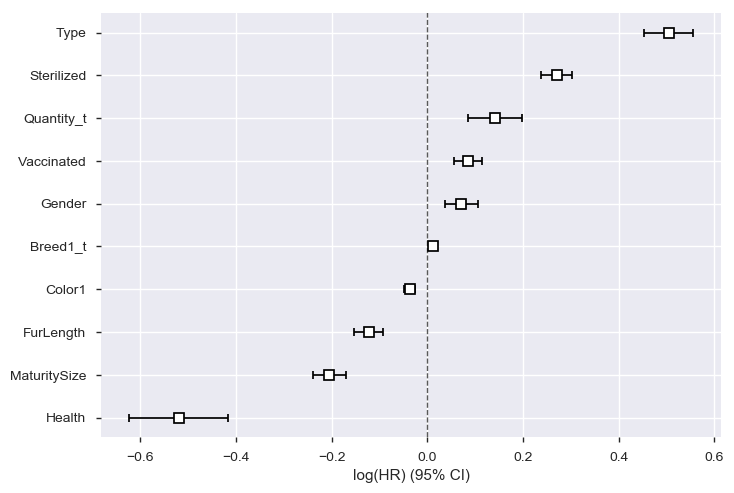

In [683]:
## Coef. Plot for the selected attributes
cph.plot()

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                   test_statistic      p  -log2(p)
Breed1_t     km            231.71 <0.005    171.40
             rank          248.35 <0.005    183.46
Color1       km             43.97 <0.005     34.80
             rank           42.34 <0.005     33.60
FurLeng

KeyboardInterrupt: 

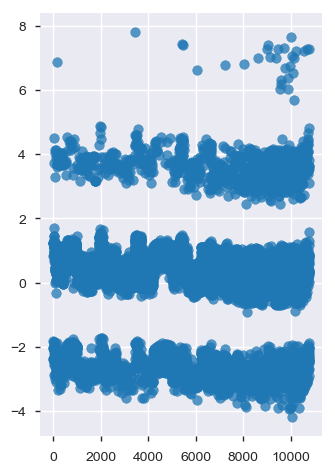

In [684]:
## Checking and printing assumptions for this dataset
## Please note the graphs are not downloading and it needs to be interupted
cph.check_assumptions(surv2, p_value_threshold=0.05, show_plots=True)

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -93694.80338, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.


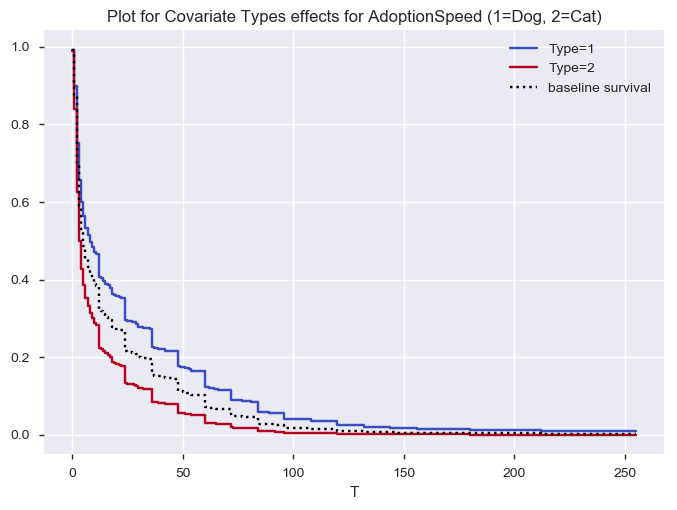

In [685]:
# Plotting the Gender for Suvivership in CoxPHFitter
cph = CoxPHFitter()
cph.fit(surv2, duration_col='Age', event_col='AdoptionSpeed_t', show_progress=True)

cph.plot_covariate_groups('Type', [1, 2], cmap='coolwarm')
plt.title("Plot for Covariate Types effects for AdoptionSpeed (1=Dog, 2=Cat)")
plt.show()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -93586.36191, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.


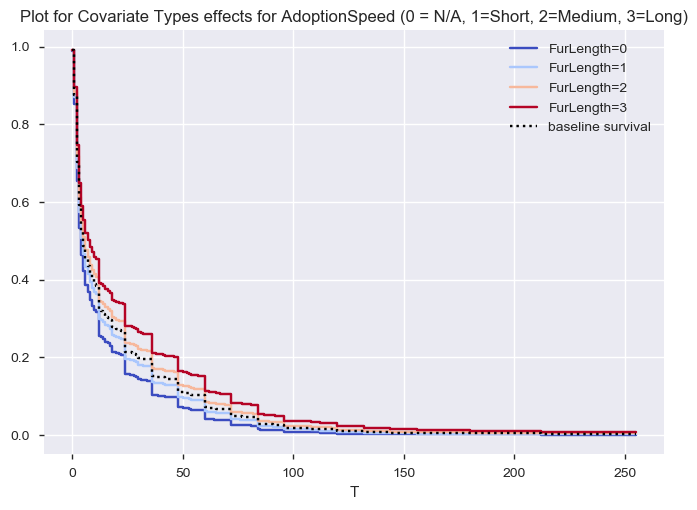

In [686]:
# Plotting the FurLength for Suvivership in CoxPHFitter

cph = CoxPHFitter()
cph.fit(surv1, duration_col='Age', event_col='AdoptionSpeed_t', show_progress=True)

cph.plot_covariate_groups('FurLength', [0, 1, 2, 3], cmap='coolwarm')
plt.title("Plot for Covariate Types effects for AdoptionSpeed (0 = N/A, 1=Short, 2=Medium, 3=Long)")
plt.show()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -93586.36191, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.


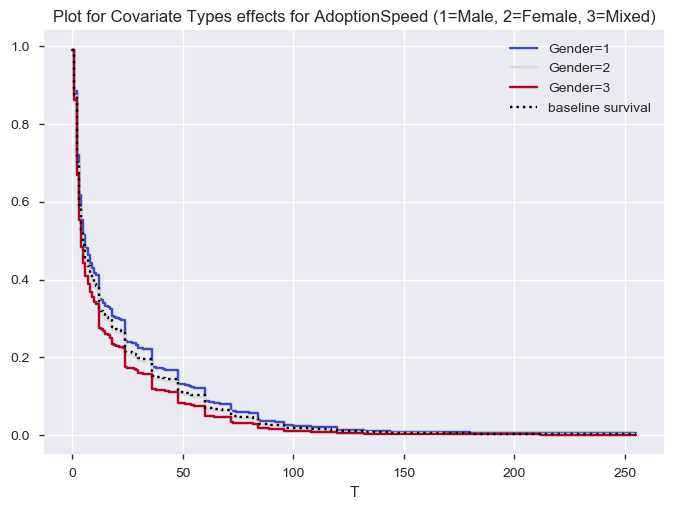

In [687]:
# Plotting the Gender variable for Suvivership in CoxPHFitter

cph = CoxPHFitter()
cph.fit(surv1, duration_col='Age', event_col='AdoptionSpeed_t', show_progress=True)

cph.plot_covariate_groups('Gender', [1, 2, 3], cmap='coolwarm')
plt.title("Plot for Covariate Types effects for AdoptionSpeed (1=Male, 2=Female, 3=Mixed)")
plt.show()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -93694.80338, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.


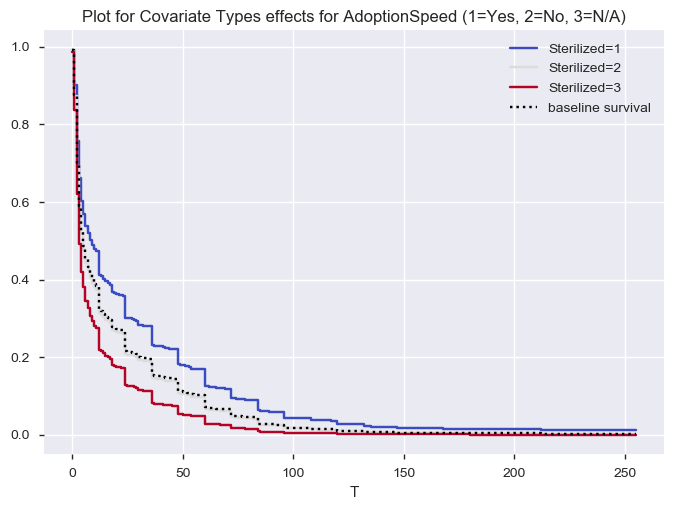

In [688]:
# Plotting the Sterilized variable for Suvivership in CoxPHFitter

cph = CoxPHFitter()
cph.fit(surv2, duration_col='Age', event_col='AdoptionSpeed_t', show_progress=True)

cph.plot_covariate_groups('Sterilized', [1, 2, 3], cmap='coolwarm')
plt.title("Plot for Covariate Types effects for AdoptionSpeed (1=Yes, 2=No, 3=N/A)")
plt.show()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -93694.80338, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.


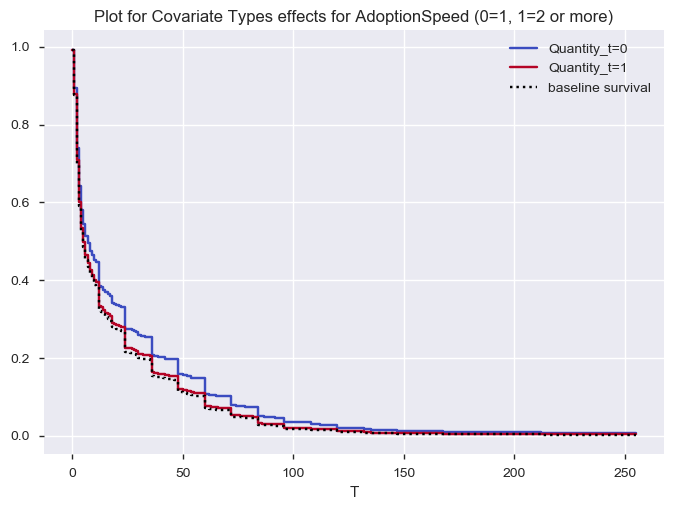

In [689]:
# Plotting the Quantity Variable for Suvivership in CoxPHFitter

cph = CoxPHFitter()
cph.fit(surv2, duration_col='Age', event_col='AdoptionSpeed_t', show_progress=True)

cph.plot_covariate_groups('Quantity_t', [0, 1], cmap='coolwarm')
plt.title("Plot for Covariate Types effects for AdoptionSpeed (0=1, 1=2 or more)")
plt.show()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -93694.80338, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.


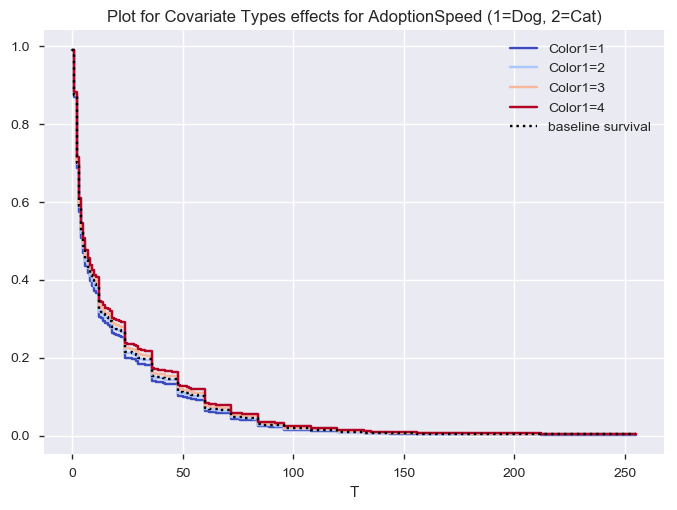

In [690]:
# Plotting the first four colors for this variable for Suvivership in CoxPHFitter

cph = CoxPHFitter()
cph.fit(surv2, duration_col='Age', event_col='AdoptionSpeed_t', show_progress=True)

cph.plot_covariate_groups('Color1', [1, 2, 3, 4], cmap='coolwarm')
plt.title("Plot for Covariate Types effects for AdoptionSpeed (1=Dog, 2=Cat)")
plt.show()

In [691]:
## Initiating  the KMP Model
kmf = KaplanMeierFitter()

In [692]:
## Fitting the KMP Model
kmf.fit(durations = surv2.Age, 
        event_observed = surv1.AdoptionSpeed_t)

<lifelines.KaplanMeierFitter: fitted with 14993 observations, 4197 censored>

In [693]:
## Printing the KMF Event Table
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,179,143,36,14993,14993
1,2304,1962,342,0,14814
2,3503,2883,620,0,12510
3,1966,1496,470,0,9007
4,1109,760,349,0,7041
5,595,399,196,0,5932
6,558,332,226,0,5337
7,281,171,110,0,4779
8,309,178,131,0,4498


In [694]:
# get the values for time = 0 from the survival table
event_at_0 = kmf.event_table.iloc[0, :]
# now calculate the survival probability for t = 0
surv_for_0 =  (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
surv_for_0

0.9904622157006603

In [695]:
# Calculate the survival probability for t = 2
event_at_2 = kmf.event_table.iloc[2, :]
surv_for_2 =  (event_at_2.at_risk - event_at_2.observed) / event_at_2.at_risk
surv_for_2

0.7695443645083933

In [696]:
## Prediction for age of 2 years
kmf.predict(2)

0.6612564958378749

In [697]:
# The survival probabilities of Pets who are between 1 and 255 years of age
kmf.predict([1,25,50,100,255])

1      0.859283
25     0.231323
50     0.142260
100    0.036662
255    0.005819
Name: KM_estimate, dtype: float64

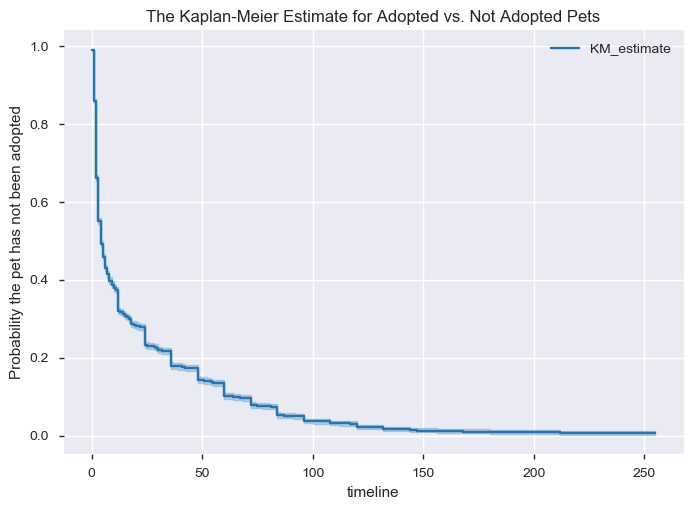

In [698]:
# plot the KM estimate
kmf.plot()
# title and y-axis label
plt.title("The Kaplan-Meier Estimate for Adopted vs. Not Adopted Pets")
plt.ylabel("Probability the pet has not been adopted")

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

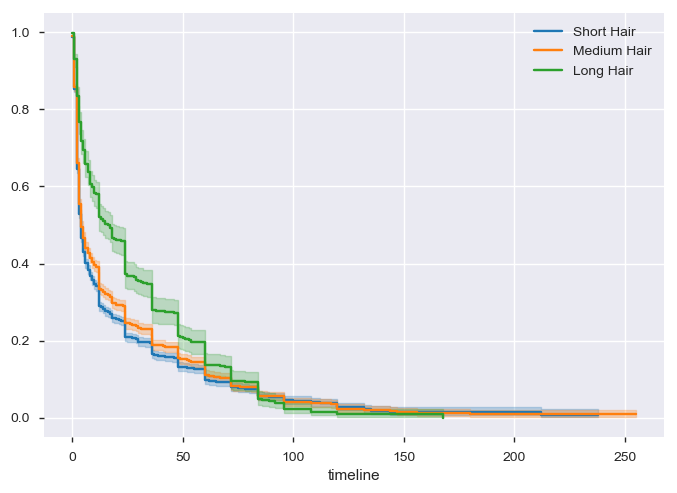

In [699]:
## Calculating the KMF Survival Models with Select Attributes and Graphing the output
T = surv1.Age
E = surv1.AdoptionSpeed_t

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
from lifelines import KaplanMeierFitter

groups = surv['FurLength']   

i1 = (groups == 1)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 2)     ## group i2 , having the pandas series  for the 2nd cohort
i3 = (groups == 3)     ## group i3 , having the pandas series  for the 2nd cohort

## fit the model for 1st cohort


kmf1.fit(T[i1], E[i1], label='Short Hair')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Medium Hair')
kmf1.plot(ax=a1)

## fit the model for 3nd cohort
kmf1.fit(T[i3], E[i3], label='Long Hair')
kmf1.plot(ax=a1)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

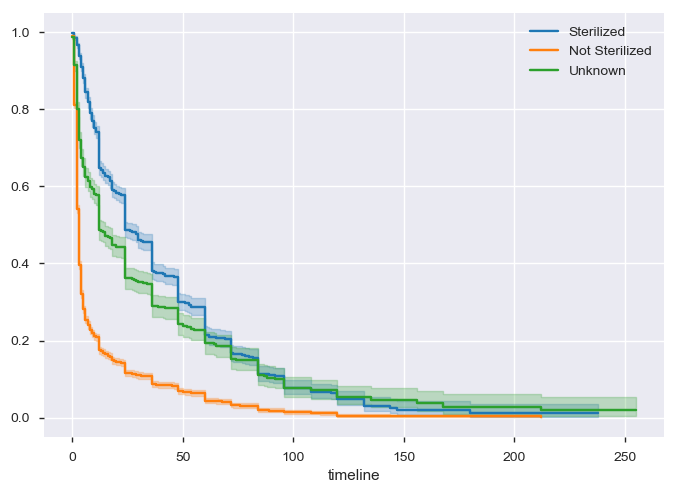

In [700]:
## Calculating the KMF Survival Models with Select Attributes and Graphing the output
T = surv1.Age
E = surv1.AdoptionSpeed_t

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
from lifelines import KaplanMeierFitter

groups = surv1['Sterilized']   
i1 = (groups == 1)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 2)     ## group i2 , having the pandas series  for the 2nd cohort
i3 = (groups == 3)     ## group i3 , having the pandas series  for the 2nd cohort

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Sterilized')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Not Sterilized')
kmf1.plot(ax=a1)

## fit the model for 2nd cohort
kmf1.fit(T[i3], E[i3], label='Unknown')
kmf1.plot(ax=a1)
plt.show

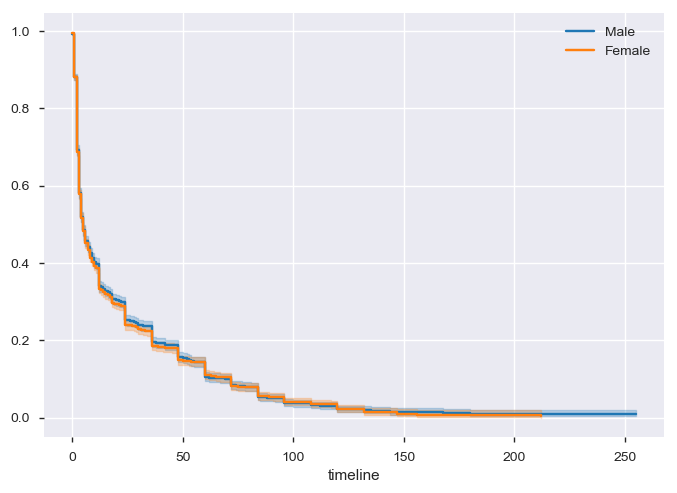

In [701]:
## Calculating the KMF Survival Models with Select Attributes and Graphing the output
T = surv1.Age
E = surv1.AdoptionSpeed_t

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
from lifelines import KaplanMeierFitter

groups = surv1['Gender']   
i1 = (groups == 1)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 2)     ## group i2 , having the pandas series  for the 2nd cohort
 
 

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Male')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Female')
kmf1.plot(ax=a1)
plt.show()

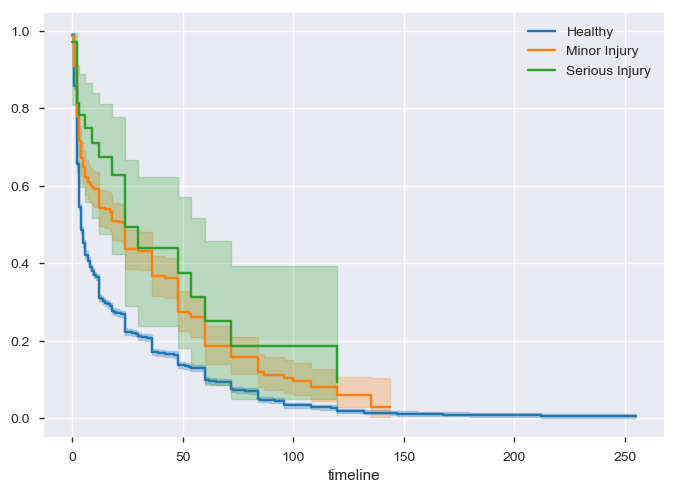

In [702]:
## Calculating the KMF Survival Models with Select Attributes and Graphing the output
T = surv1.Age
E = surv1.AdoptionSpeed_t

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
from lifelines import KaplanMeierFitter

groups = surv1['Health']   
i1 = (groups == 1)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 2)     ## group i2 , having the pandas series  for the 2nd cohort
i3 = (groups == 3)     ## group i3 , having the pandas series  for the 2nd cohort

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Healthy')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Minor Injury')
kmf1.plot(ax=a1)

## fit the model for 2nd cohort
kmf1.fit(T[i3], E[i3], label='Serious Injury')
kmf1.plot(ax=a1)
plt.show()

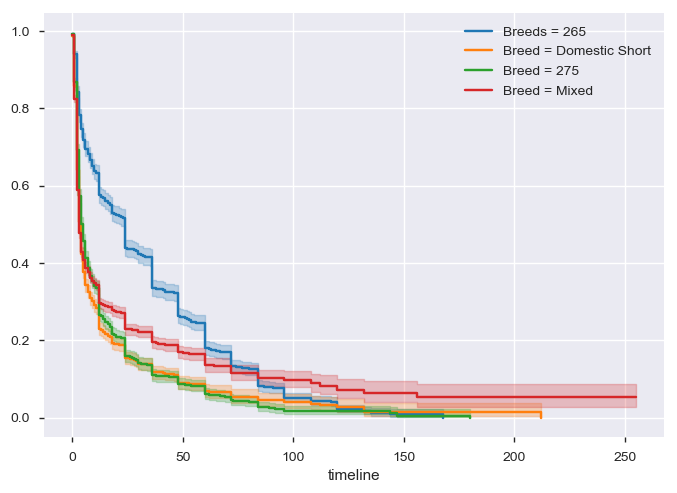

In [703]:
## Calculating the KMF Survival Models with Select Attributes and Graphing the output
T = surv1.Age
E = surv1.AdoptionSpeed_t

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
from lifelines import KaplanMeierFitter

groups = surv2['Breed1_t']   
i1 = (groups == 265)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 266)     ## group i2 , having the pandas series  for the 2nd cohort
i3 = (groups == 275)     ## group i3 , having the pandas series  for the 2nd cohort
i4 = (groups == 307)     ## group i4 , having the pandas series  for the 2nd cohort

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Breeds = 265')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Breed = Domestic Short')
kmf1.plot(ax=a1)

## fit the model for 3nd cohort
kmf1.fit(T[i3], E[i3], label='Breed = 275')
kmf1.plot(ax=a1)

## fit the model for 4nd cohort
kmf1.fit(T[i4], E[i4], label='Breed = Mixed')
kmf1.plot(ax=a1)
plt.show()

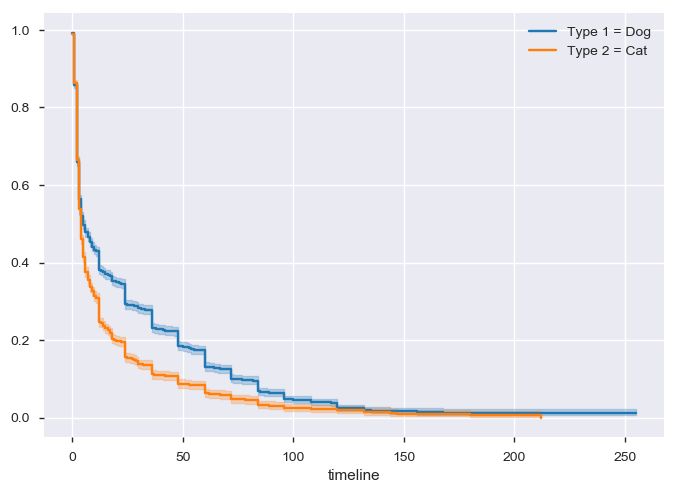

In [704]:
## Calculating the KMF Survival Models with Select Attributes and Graphing the output
T = surv1.Age
E = surv1.AdoptionSpeed_t

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
from lifelines import KaplanMeierFitter

## Two Cohorts are compared. Cohort 1. Streaming TV Not Subscribed by users, and Cohort  2. Streaming TV subscribed by the users.
groups = surv2['Type']   
i1 = (groups == 1)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 2)     ## group i2 , having the pandas series  for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Type 1 = Dog')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Type 2 = Cat')
kmf1.plot(ax=a1)



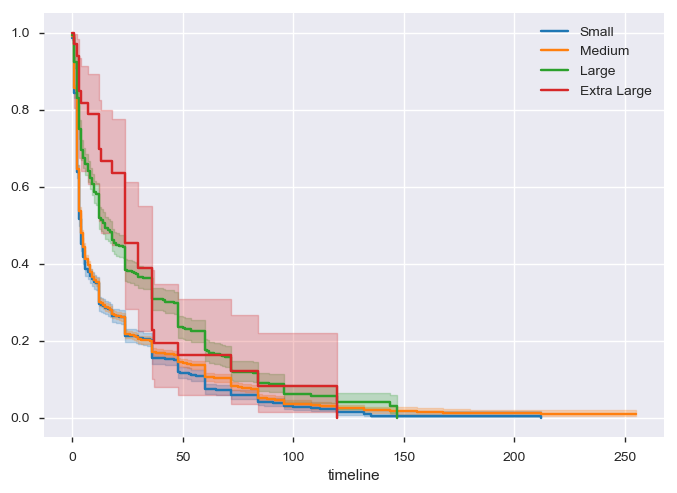

In [705]:
## Calculating the KMF Survival Models with Select Attributes and Graphing the output
T = surv1.Age
E = surv1.AdoptionSpeed_t

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
from lifelines import KaplanMeierFitter

groups = surv2['MaturitySize']   
i1 = (groups == 1)      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 2)     ## group i2 , having the pandas series  for the 2nd cohort
i3 = (groups == 3)     ## group i3 , having the pandas series  for the 2nd cohort
i4 = (groups == 4)     ## group i4 , having the pandas series  for the 2nd cohort

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Small')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Medium')
kmf1.plot(ax=a1)

## fit the model for 3nd cohort
kmf1.fit(T[i3], E[i3], label='Large')
kmf1.plot(ax=a1)

## fit the model for 4nd cohort
kmf1.fit(T[i4], E[i4], label='Extra Large')
kmf1.plot(ax=a1)
plt.show()